In [0]:
#Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
!pip install -U -q PyDrive

In [2]:
# Point to Google Drive Folder
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load Image Files
dog = cv2.imread('drive/My Drive/files/dog.jpg')
f_0_2 = cv2.imread('drive/My Drive/files/f_0_2.jpg')
f_15_20 = cv2.imread('drive/My Drive/files/f_15_20.jpg')
f_25_32 = cv2.imread('drive/My Drive/files/f_25_32.jpg')
f_60_100 = cv2.imread('drive/My Drive/files/f_60_100.jpg')
m_8_12 = cv2.imread('drive/My Drive/files/m_8_12.jpg')
m_25_32 = cv2.imread('drive/My Drive/files/m_25_32.jpg')
m_60_100 = cv2.imread('drive/My Drive/files/m_60_100.jpg')

In [0]:
# Google Cloud SDK
from google.colab import auth
auth.authenticate_user()
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Import Files from Google Drive
myfile = drive.CreateFile({'id': '1jXfnNt41Vjz_0fSjchFQHYyrTGY_0MKB'})
myfile.GetContentFile('dylan_image.png')

##### MODELS #####
# Age Caffe Model Files
myfile2 = drive.CreateFile({'id': '1dft5ftbctrzePJRw-a3BYp-TE5MTn6gV'})
myfile2.GetContentFile('age_net.caffemodel')

myfile3 = drive.CreateFile({'id': '1qOEoBt4Y3H3VJEdaAfBgB6R8gFrZW5Pc'})
myfile3.GetContentFile('deploy_age.prototxt')

# Gender Caffe Model Files
myfile4 = drive.CreateFile({'id': '1zB2M73spF2Gx19u4g782fqElIsBu3AA8'})
myfile4.GetContentFile('gender_net.caffemodel')

myfile5 = drive.CreateFile({'id': '1EhVZY2J2_ooPBHJOnsoRLUDFKaTdQZJ4'})
myfile5.GetContentFile('deploy_gender.prototxt')

# Haar Cascade
myfile6 = drive.CreateFile({'id': '1i2jOO3tMl7gCMcLB5OiCVjzTRuGEwYeq'})
myfile6.GetContentFile('haarcascade_frontalface_alt.xml')

In [0]:
# Load the model mean value
model_mean_values = (78.4263377603, 87.7689143744, 114.895847746)

# Age Groups
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']

# Gender Groups
gender_list = ['Male', 'Female']

# Load the models
  
age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
  
gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')

In [17]:
# Define IMG
# img = dog
# img = f_0_2
# img = f_15_20
# img = f_25_32
# img = f_60_100
# img = m_8_12
img = m_25_32
# img = m_60_100
# img = cv2.imread("dylan_image.png")

type(img)

numpy.ndarray

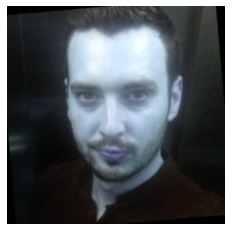

In [18]:
# Display Image
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
# Load Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

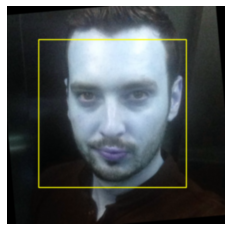

In [20]:
# Find Face in Source

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

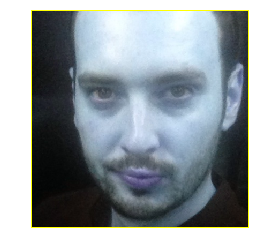

In [21]:
# Crop image
face_crop = img[y:y+h, x:x+w].copy()
plt.imshow(face_crop)
plt.axis('off')

blob = cv2.dnn.blobFromImage(face_crop, 1, (227, 227), model_mean_values, swapRB=False)

In [22]:
# Predict Gender
gender_net.setInput(blob)
gender_preds = gender_net.forward()
gender = gender_list[gender_preds[0].argmax()]
print("Gender : " + gender)

Gender : Male


In [23]:
# Predict Age
age_net.setInput(blob)
age_preds = age_net.forward()
age = age_list[age_preds[0].argmax()]
print("Age Range: " + age)

Age Range: (25, 32)


In [24]:
# Image Overlay
overlay_text = "%s %s" % (gender, age)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, overlay_text, (x, y), font, .9, (255, 255, 255), 2, cv2.LINE_AA)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

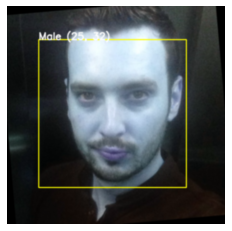

In [25]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()